# Expectation-Maximization algorithm implemented in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Set-up

Suppose we are given two sets of samples, red and blue, drawn from two different normal distributions.<br />
Our goal is to find the mean and standard deviation for each group.

In [2]:
red_mean = 3.0
red_std = 0.9

blue_mean = 8.0
blue_std = 2.5

red = np.random.normal(red_mean, red_std, size = 20)
blue = np.random.normal(blue_mean, blue_std, size = 20)

both_colors = np.sort(np.concatenate((red, blue)))

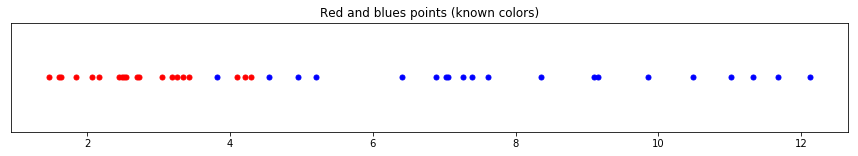

In [3]:
plt.rcParams['figure.figsize'] = (15, 2)
plt.plot(red, np.zeros_like(red), '.', color = 'r', markersize = 10)
plt.plot(blue, np.zeros_like(blue), '.', color = 'b', markersize = 10)
plt.title("Red and blues points (known colors)")
plt.yticks([]);

In [4]:
print(f"For red points, the mean is {np.mean(red):.5f}; the std is {np.std(red):.5f}.")
print(f"For blue points, the mean is {np.mean(blue):.5f}; the std is {np.std(blue):.5f}.")

For red points, the mean is 2.74837; the std is 0.83042.
For blue points, the mean is 8.06340; the std is 2.41075.


Now, suppose that we hide the color of every point.<br />
We have to estimate the mostly likely values for the mean and standard deviation of each sample.

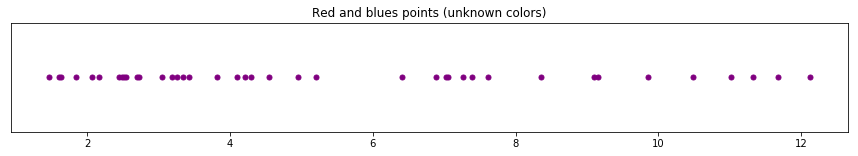

In [5]:
plt.rcParams['figure.figsize'] = (15, 2)
plt.plot(both_colors, np.zeros_like(both_colors), '.', color = 'purple', markersize = 10)
plt.title("Red and blues points (unknown colors)")
plt.yticks([]);

# Expectation-Maximization algorithm

In [6]:
# Compute the weight for each color at each data point
def weight_of_color(color_likelihood, total_likelihood):
    return color_likelihood / total_likelihood


# Re-estimate the parameters using the weight
def estimate_mean(data, weight):
    return np.sum(data*weight) / np.sum(weight)


def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)


# Plot the red and blue bell curves
def plot_guess(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha = 1):
    # Plot the purple points
    plt.rcParams['figure.figsize'] = (15, 5)
    plt.plot(both_colors, np.zeros_like(both_colors), '.', color = 'purple', markersize = 10)
    
    # Compute x-axis
    lo = np.floor(both_colors.min()) - 1
    hi = np.ceil(both_colors.max()) + 1
    x = np.linspace(lo, hi, 500)
    
    # Plot the bell curves
    plt.plot(x, stats.norm(red_mean_guess, red_std_guess).pdf(x), color = 'r', alpha = alpha)
    plt.plot(x, stats.norm(blue_mean_guess, blue_std_guess).pdf(x), color = 'b', alpha = alpha)
    
    r_height = stats.norm(red_mean_guess, red_std_guess).pdf(red_mean_guess)
    b_height = stats.norm(blue_mean_guess, blue_std_guess).pdf(blue_mean_guess)
    
    plt.vlines(red_mean_guess, 0, r_height, 'r', '--', alpha = alpha)
    plt.vlines(blue_mean_guess, 0, b_height, 'b', '--', alpha = alpha)

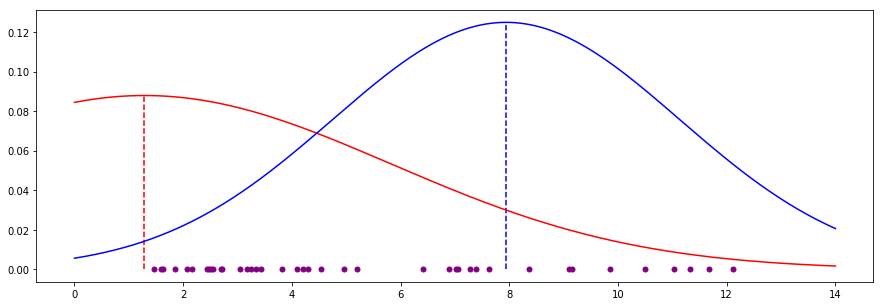

In [7]:
# Initialization
red_mean_guess = np.random.uniform(1, 10)
blue_mean_guess = np.random.uniform(1, 10)

red_std_guess = np.random.uniform(1, 5)
blue_std_guess = np.random.uniform(1, 5)

plot_guess(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha = 1)

## Training and testing

Text(0.5, 1.0, 'Estimate of the distributions after 30 iterations of EM algorithm')

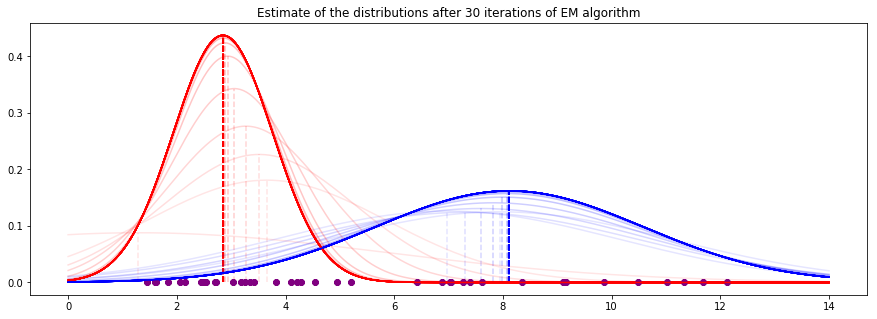

In [8]:
n_iter = 30

alphas = np.linspace(0.1, 1, n_iter)

plot_guess(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha = 0.1)

for i in range(n_iter):
    # E-step
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colors)
    likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colors)
    
    red_weight = weight_of_color(likelihood_of_red, likelihood_of_red + likelihood_of_blue)
    blue_weight = weight_of_color(likelihood_of_blue, likelihood_of_red + likelihood_of_blue)
    
    # M-step
    red_mean_guess = estimate_mean(both_colors, red_weight)
    blue_mean_guess = estimate_mean(both_colors, blue_weight)
    
    red_std_guess = estimate_std(both_colors, red_weight, red_mean_guess)
    blue_std_guess = estimate_std(both_colors, blue_weight, blue_mean_guess)
    
    plot_guess(red_mean_guess, blue_mean_guess, red_std_guess, blue_std_guess, alpha = alphas[i])

plt.title(f"Estimate of the distributions after {n_iter} iterations of EM algorithm")

In [9]:
print(f"For red points")
print(f"the true mean is {np.mean(red):.5f}; the true std is {np.std(red):.5f}.")
print(f"The estimated mean is {red_mean_guess:.5f}; the estimated std is {red_std_guess:.5f}.")
print()
print(f"For blue points")
print(f"the true mean is {np.mean(blue):.5f}; the true std is {np.std(blue):.5f}.")
print(f"The estimated mean is {blue_mean_guess:.5f}; the estimated std is {blue_std_guess:.5f}.")

For red points
the true mean is 2.74837; the true std is 0.83042.
The estimated mean is 2.84813; the estimated std is 0.91285.

For blue points
the true mean is 8.06340; the true std is 2.41075.
The estimated mean is 8.12024; the estimated std is 2.46228.
